In [1]:
import pandas as pd
import sklearn
import numpy as np
import statsmodels as sm
import warnings
import matplotlib.pyplot as plt
from matplotlib import *
import random 
import seaborn as sns
warnings.filterwarnings('ignore')


In [2]:
#Splitting x_train and y_train
df = pd.read_csv("/Users/Xy_train.csv")
x_train = df.iloc[:,:-1]
y_train = df.iloc[:,-1]
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,42457,M,45.0,170.0,65.0,85,1.2,1.2,1.0,1.0,...,15.4,1.0,1.5,41.0,68.0,34,Y,0,Y,0
1,53335,M,50.0,170.0,75.0,95,1.0,1.0,1.0,1.0,...,15.2,1.0,0.9,38.0,45.0,67,Y,0,Y,1
2,30283,M,70.0,160.0,70.0,87.8,0.6,0.6,1.0,1.0,...,15.8,1.0,1.0,22.0,24.0,43,Y,0,Y,1
3,7654,M,35.0,180.0,90.0,99,1.2,1.0,1.0,1.0,...,16.1,1.0,1.0,16.0,31.0,89,Y,0,N,1
4,4978,F,50.0,150.0,60.0,78.4,1.0,1.0,1.0,1.0,...,14.0,1.0,0.8,23.0,19.0,16,Y,0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,23835,M,40.0,160.0,60.0,84.5,0.9,1.0,1.0,1.0,...,14.0,1,0.9,20.0,17.0,15,Y,0,N,1
44549,44943,M,35.0,180.0,75.0,92.0,1.0,1.2,1.0,1.0,...,15.9,1,0.9,19.0,21.0,18,Y,0,Y,0
44550,36348,M,20.0,175.0,60.0,76.5,0.9,0.3,1.0,1.0,...,15.6,1,1.2,18.0,13.0,18,Y,1,Y,1
44551,37798,M,45.0,160.0,65.0,87.2,0.5,1.0,1.0,1.0,...,15.9,1,1.3,37.0,48.0,96,Y,1,Y,1


In [3]:
# function for random color selection for the plots
def random_color():
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    return color

In [4]:
#function to detected misformatted and try to transform them to the right format
def detect_misformatted(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            if df[i].apply(type).eq(str).all():
                print(i, "is correctly formatted")
            else:
                print(i, "is not correctly formatted (object)")
        else:
            if df[i].apply(type).eq(float).all():
                try:
                    df[i] = df[i].astype(float)
                except:
                    print(i, "is not correctly formatted (not object)")

In [5]:
detect_misformatted(df)

gender is correctly formatted
waist(cm) is not correctly formatted (object)
Urine protein is not correctly formatted (object)
oral is not correctly formatted (object)
tartar is not correctly formatted (object)


In [6]:
# Taking a look at the data
print(df.gender.value_counts())
print(df["Urine protein"].value_counts())
print(df.oral.value_counts())
print(df.tartar.value_counts())
print(df["waist(cm)"].value_counts())

M    28326
F    16227
Name: gender, dtype: int64
1.0    30928
1      11162
2.0     1066
3.0      558
2        366
3        185
4.0      151
5.0       51
4         51
5         15
6.0        8
6          2
yes        1
Name: Urine protein, dtype: int64
Y      44549
12         1
yes        1
Name: oral, dtype: int64
Y    24652
N    19900
Name: tartar, dtype: int64
80       1104
82       1053
84       1004
81        990
78        959
         ... 
100.7       1
118.5       1
61.6        1
114.8       1
67.9        1
Name: waist(cm), Length: 1000, dtype: int64


In [7]:
#Revealing rows to delete because of problems with the data
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

l_1 = list(df["waist(cm)"])
misplaced_1 = [ind for ind,x in enumerate(l_1) if isfloat(x) == False]
# The Identified problematic rows
print(misplaced_1[0])

#Deleting rows with misplaced data ( Run only once)
try:
  df.drop([misplaced_1[0]],axis=0,inplace = True)
  print("Sample # ",misplaced_1[0] ,"was deleted")
except:
  print("Already deleted")

df["waist(cm)"] = df["waist(cm)"].astype(float)


22816
Sample #  22816 was deleted


In [8]:
#Identified as useless, because all of the samples are 1 and the only 12 
# different samples are misformatted
#Fixing oral values
df = df[(df["oral"] != "yes") & ((df["oral"] != "12"))]
df["oral"] = df["oral"].astype(object)
print(df["oral"].value_counts())

Y    44548
Name: oral, dtype: int64


In [9]:
#Removing the row with the yes value and merging the float and the integers to one value 
df = df[df["Urine protein"] != "yes"]
df["Urine protein"] = df["Urine protein"].astype(float)
print(df["Urine protein"].value_counts())
print(pd.crosstab(df["Urine protein"],"Prior Probabity")/len(df))

1.0    42088
2.0     1431
3.0      743
4.0      202
5.0       66
6.0       10
Name: Urine protein, dtype: int64
col_0          Prior Probabity
Urine protein                 
1.0                   0.944757
2.0                   0.032122
3.0                   0.016678
4.0                   0.004534
5.0                   0.001482
6.0                   0.000224


In [10]:
#replacing the nan value with the mode
df['tartar'][df["tartar"] == "nan"] = df['tartar'].mode()[0]
print(df["tartar"].value_counts())

Y    24649
N    19899
Name: tartar, dtype: int64


In [11]:
#plot histogram and density of all the continous features ( without the outliers !)
def plot_hist(df):
    for i in df.columns:
        try:
            sns.displot( height=4,aspect=1,data = df[i][(df[i]<= (df[i].quantile(0.75) + 1.5*(df[i].quantile(0.75) - df[i].quantile(0.25))))
            & (df[i]>=0)].astype(float),kde=True,stat = "proportion",fill=True,color = random_color())
        except:
            print(i, "Not a continous feature")

    plt.show()

gender Not a continous feature
oral Not a continous feature
tartar Not a continous feature


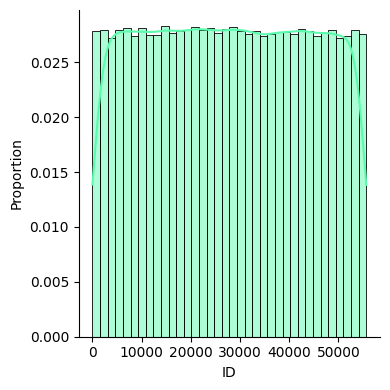

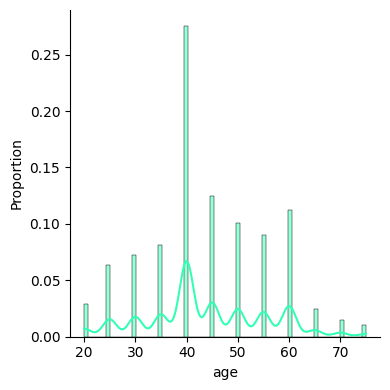

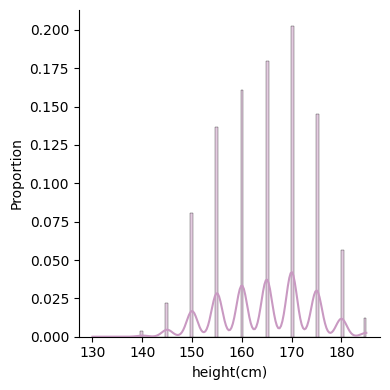

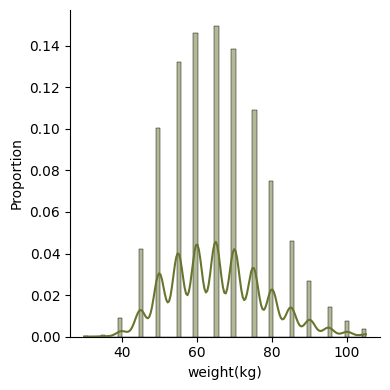

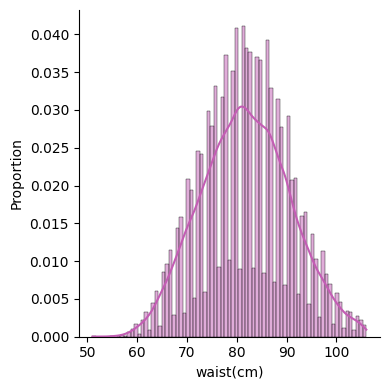

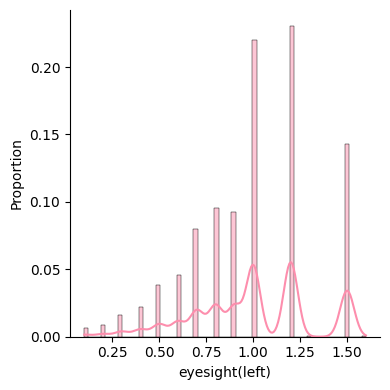

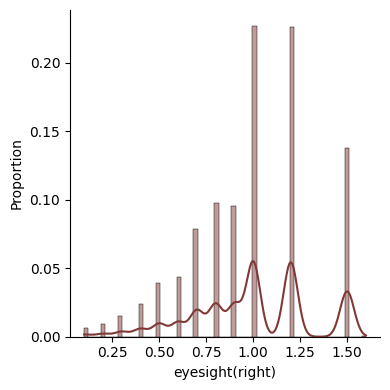

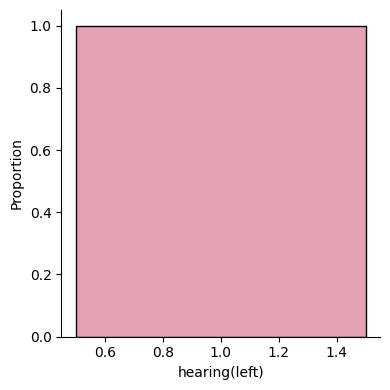

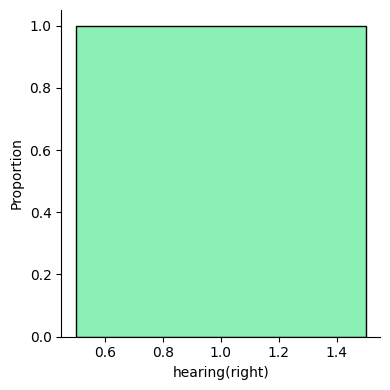

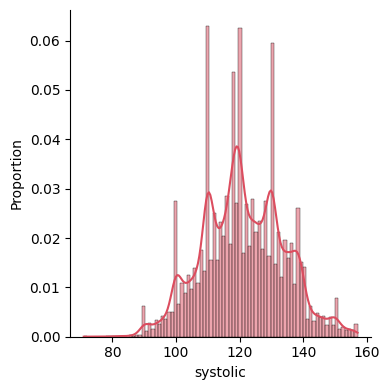

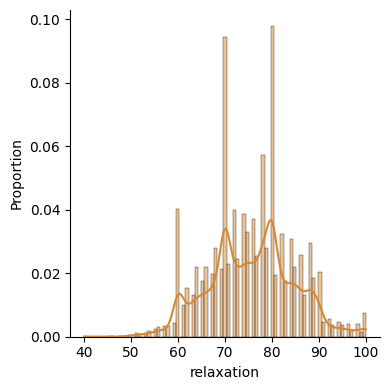

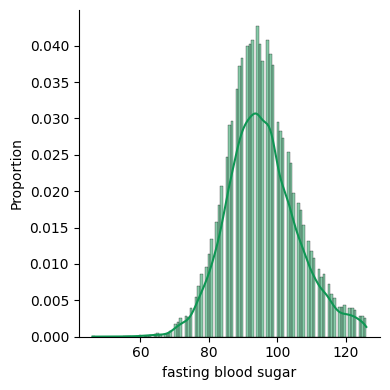

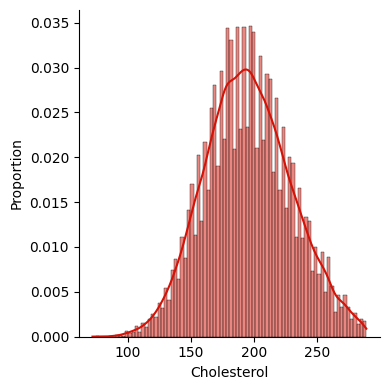

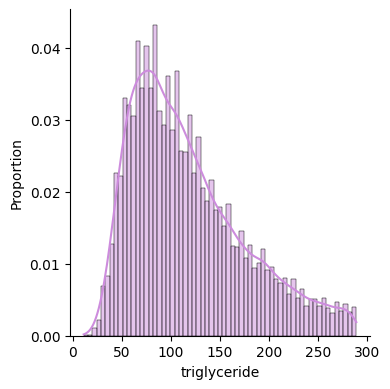

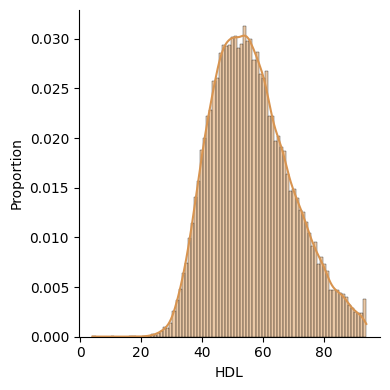

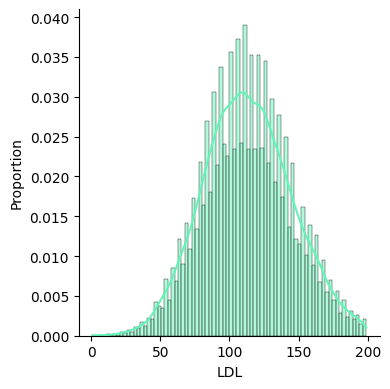

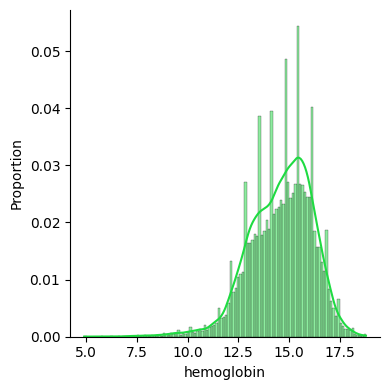

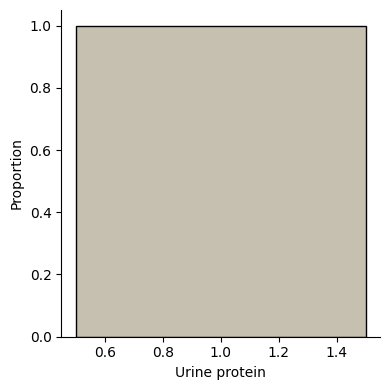

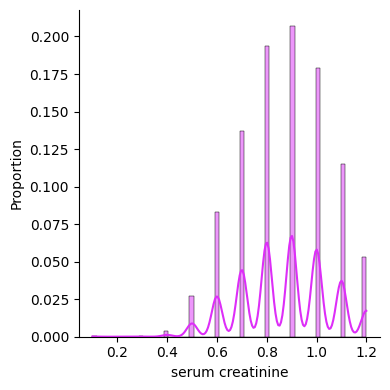

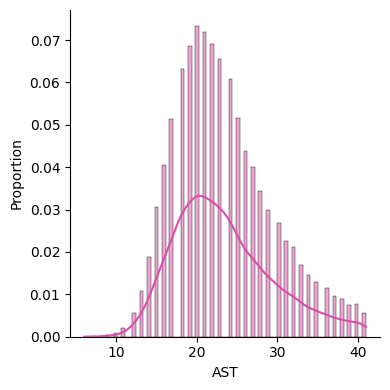

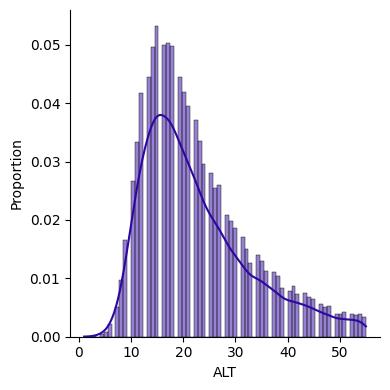

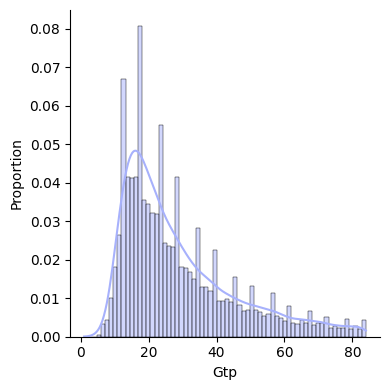

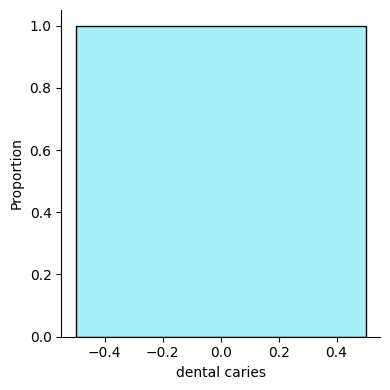

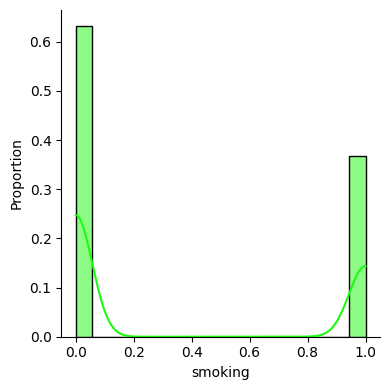

In [12]:
plot_hist(df)

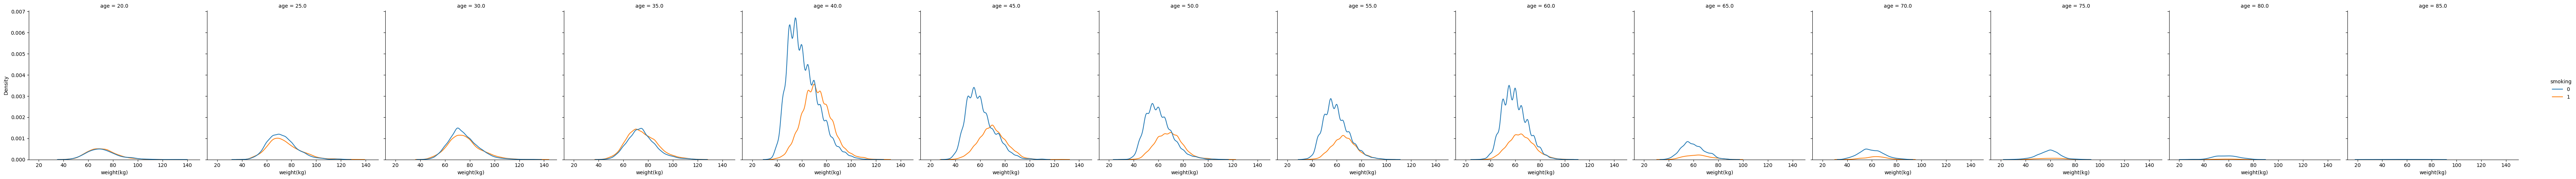

In [13]:
#Intresting phenomena where at age 40 the distribution of weight becomes different between smokes and non smokers.
#This is excluded from the report but will be further investigated on part B.
sns.displot(data=df, x="weight(kg)", hue="smoking", col="age", kind="kde")


             Cholesterol      LDL
Cholesterol      1.00000  0.73496
LDL              0.73496  1.00000


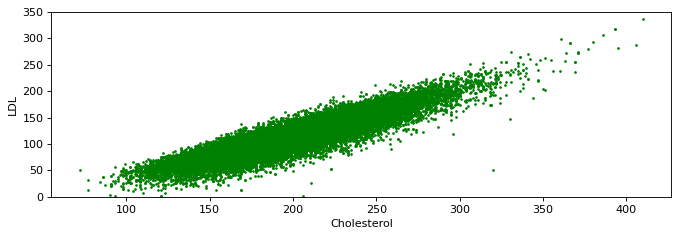

In [14]:
#Plotting and printing the correlation between Cholesterol and LDL
plt.figure(dpi=80 , figsize=(10,3))
plt.ylim(0,350)
plt.xlabel("Cholesterol")
plt.ylabel("LDL")
plt.scatter(x=df["Cholesterol"],y=df["LDL"] ,c = "green" , s = 2 )
print(df[["Cholesterol","LDL"]].corr())

            weight(kg)  waist(cm)
weight(kg)     1.00000    0.82115
waist(cm)      0.82115    1.00000


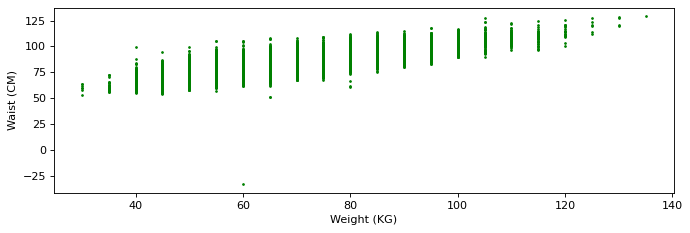

In [15]:
df["weight(kg)"].astype(float)
df = df[df["waist(cm)"] != "ok"]
df["waist(cm)"] = df["waist(cm)"].astype(float)
print(df[["weight(kg)","waist(cm)"]].corr())
plt.figure(dpi=80 , figsize=(10,3))
plt.xlabel("Weight (KG)")
plt.ylabel("Waist (CM)")

plt.scatter(x=df["weight(kg)"],y=df["waist(cm)"] ,c = "green" , s = 2)


            systolic  relaxation
systolic    1.000000    0.729996
relaxation  0.729996    1.000000


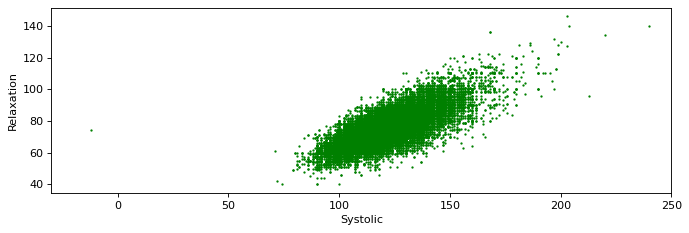

In [16]:
print(df[["systolic","relaxation"]].corr())
plt.figure(dpi=80 , figsize=(10,3))
plt.xlim(-30,250)
plt.xlabel("Systolic")
plt.ylabel("Relaxation")
plt.scatter(x=df["systolic"],y=df["relaxation"] ,c = "green" , s = 1.1)


In [17]:
# Displaying the missing values count at each cokumn/feature
display(pd.DataFrame(df.isna().sum().sort_values(ascending=False)).style.background_gradient(cmap='Reds'))

,0
height(cm),43
triglyceride,25
ALT,22
systolic,20
hearing(right),17
Cholesterol,15
hemoglobin,15
relaxation,13
HDL,12
fasting blood sugar,11


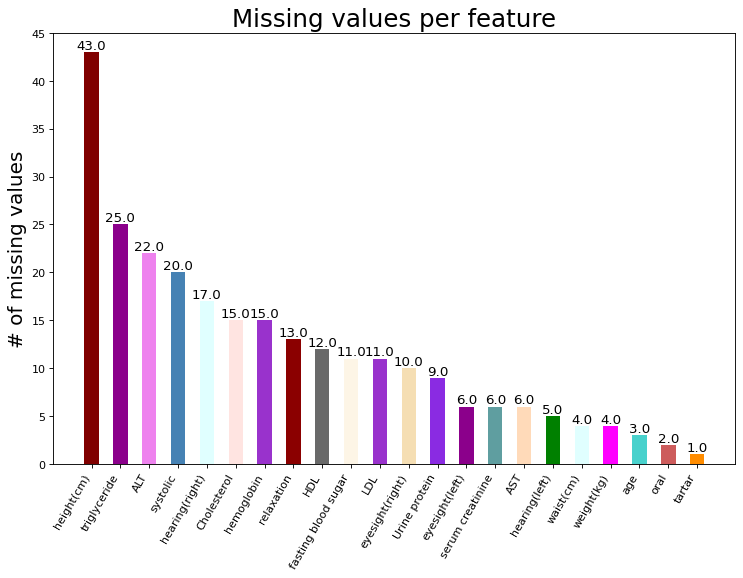

In [18]:
# Plotting the missing values
missing_vals = df.isna().sum().sort_values(ascending=False)
missing_vals = missing_vals[missing_vals > 0]
# Sampling random colors for the plot
n = len(missing_vals)
all_colors=[x for x in plt.cm.colors.cnames.keys()]
random.seed(101)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure(figsize=(11,7), dpi= 80)
plt.bar(missing_vals.index, missing_vals, color=c, width=.5)
for i, val in enumerate(missing_vals.values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(missing_vals.index, rotation=60, horizontalalignment= 'right')
plt.title("Missing values per feature", fontsize=22)
plt.ylabel('# of missing values', fontsize=18)
plt.ylim(0, 45)
plt.show()


In [19]:
#Checking for missing values
print("Total missing values : ",df.isna().sum().sum())

Total missing values :  260


In [20]:
percentage_null = (df.isna().sum().sum()/len(df))*100
print(percentage_null,"% Out of the data is missing")

0.5836270174414689 % Out of the data is missing


In [21]:
#removing the null values
df.dropna(inplace = True)

In [22]:
#Basic statistics of the data
display(df.drop(columns = ["ID"]).describe().loc[["mean","std","min","25%","50%","75%","max"]].style.background_gradient(cmap='Blues'))

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
mean,44.173326,164.666179,65.891840,82.037549,1.013231,1.009688,1.025729,1.026494,121.522881,76.007608,99.349375,196.737243,126.560045,57.278875,114.838672,14.620610,1.086145,0.907586,26.179651,27.032347,39.927428,0.213708,0.367428
std,12.075602,9.184391,12.842170,9.293766,0.486634,0.494527,0.158327,0.160601,14.272444,9.680102,20.967344,36.152933,71.658976,14.784625,41.097297,1.567857,0.402118,4.740143,19.294221,31.222037,49.999592,0.409928,0.482110
min,20.000000,130.000000,30.000000,-33.000000,0.100000,0.100000,1.000000,1.000000,-102.000000,40.000000,46.000000,72.000000,-35.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,219.000000,160.000000,66.000000,135.000000,15.700000,1.000000,1.000000,28.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,949.000000,146.000000,423.000000,410.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,999.000000,1090.000000,2914.000000,999.000000,1.000000,1.000000


In [23]:
#Removing all unreasonable values - removing the entire tuple if one of the values is unreasonable
# Fixing systolic values (there were negative values and values above 250)
df = df[(df["systolic"]> 0) & (df["systolic"]< 250)]
# Fixing fasting blood sugar values (there were values above 400 )
df = df[(df["fasting blood sugar"]> 0) & (df["fasting blood sugar"]< 200)]
# Fixing triglyceride values (there were values above 500 )
df = df[(df["triglyceride"]> 0) & (df["triglyceride"]< 500)]
# Fixing HDL cholesterol values (there were values above 300 )
df = df[(df["HDL"]> 10) & (df["HDL"]< 300)]
# Fixing LDL cholesterol values (there were values above 1800 )
df = df[(df["LDL"]> 0) & (df["LDL"]< 300)]
# Fixing serum creatinine values (there were values above 1.5 )
df = df[(df["serum creatinine"]> 0) & (df["serum creatinine"]< 1.5)]
# Fixing AST values (there were values above 50 )
df = df[(df["AST"]> 0) & (df["AST"]< 50)]
# Fixing ALT values (there were values above 100 )
df = df[(df["ALT"]> 0) & (df["ALT"]< 100)]
# Fixing Gtp values (there were values above 100 )
df = df[(df["Gtp"]> 0) & (df["Gtp"]< 100)]



In [24]:
display(df.info())
# object values urine protein,waist(cm) that shold be float/int but identified as object


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40096 entries, 1 to 44552
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   40096 non-null  int64  
 1   gender               40096 non-null  object 
 2   age                  40096 non-null  float64
 3   height(cm)           40096 non-null  float64
 4   weight(kg)           40096 non-null  float64
 5   waist(cm)            40096 non-null  float64
 6   eyesight(left)       40096 non-null  float64
 7   eyesight(right)      40096 non-null  float64
 8   hearing(left)        40096 non-null  float64
 9   hearing(right)       40096 non-null  float64
 10  systolic             40096 non-null  float64
 11  relaxation           40096 non-null  float64
 12  fasting blood sugar  40096 non-null  float64
 13  Cholesterol          40096 non-null  float64
 14  triglyceride         40096 non-null  float64
 15  HDL                  40096 non-null 

None

In [25]:
x_train.corr().style.background_gradient("BuGn")

,ID,age,height(cm),weight(kg),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,serum creatinine,AST,ALT,Gtp,dental caries
ID,1.000000,0.001817,0.003741,0.003081,0.012597,0.003470,0.004498,-0.002745,0.000340,-0.000314,0.001928,-0.003402,0.002138,-0.005821,-0.000085,0.001390,-0.002777,-0.001279,-0.002951,0.000626,-0.000513
age,0.001817,1.000000,-0.480930,-0.325326,-0.193642,-0.188604,0.204489,0.208728,0.132410,0.050921,0.180835,0.057794,0.015517,0.008264,0.043046,-0.261970,-0.004877,0.029663,-0.064636,0.013609,-0.111757
height(cm),0.003741,-0.480930,1.000000,0.676907,0.151194,0.156250,-0.078804,-0.079057,0.079977,0.117240,0.019907,-0.081390,0.157034,-0.213216,-0.048195,0.537816,0.018142,0.043108,0.127736,0.140377,0.080084
weight(kg),0.003081,-0.325326,0.676907,1.000000,0.107747,0.112923,-0.049581,-0.053485,0.255159,0.273587,0.136567,0.025984,0.323755,-0.356548,0.039089,0.488863,0.009318,0.121640,0.250995,0.210337,0.075699
eyesight(left),0.012597,-0.193642,0.151194,0.107747,1.000000,0.357019,-0.044312,-0.048974,-0.018929,0.006349,-0.041152,-0.006571,0.017195,-0.014722,-0.006500,0.095012,0.002610,-0.007802,0.018927,0.002774,0.001619
eyesight(right),0.003470,-0.188604,0.156250,0.112923,0.357019,1.000000,-0.044087,-0.047077,-0.013424,0.011377,-0.043659,-0.010097,0.018653,-0.021830,-0.006255,0.093862,0.004164,-0.006391,0.024391,0.011300,0.015208
hearing(left),0.004498,0.204489,-0.078804,-0.049581,-0.044312,-0.044087,1.000000,0.516151,0.054037,0.009662,0.040864,-0.020528,0.002867,-0.017479,-0.014454,-0.025626,-0.000747,0.010157,-0.000938,0.012804,-0.013315
hearing(right),-0.002745,0.208728,-0.079057,-0.053485,-0.048974,-0.047077,0.516151,1.000000,0.050980,0.006938,0.040655,-0.022550,-0.003442,-0.014697,-0.014567,-0.027428,-0.000591,0.008091,-0.004033,0.009478,-0.014462
systolic,0.000340,0.132410,0.079977,0.255159,-0.018929,-0.013424,0.054037,0.050980,1.000000,0.730009,0.167295,0.056610,0.192386,-0.080623,0.013551,0.177470,-0.005386,0.081477,0.090247,0.164736,0.026269
relaxation,-0.000314,0.050921,0.117240,0.273587,0.006349,0.011377,0.009662,0.006938,0.730009,1.000000,0.147814,0.095093,0.217585,-0.087809,0.039417,0.235118,-0.003288,0.085765,0.105948,0.180496,0.030347


In [26]:
#Searching for suspicious Unbalanced data
suspicious_cols = []
cols = df.columns
for col in cols:
    values = df[col].value_counts()[:]
    values = values/len(df)
    if (np.max(values) - np.min(values)) > 0.2:
        print(col, "is suspicous for being unbalanced")
        suspicious_cols.append(col)
        print("Standard Deviation in % : " , np.std(values))
print("Total of Suspicious columns : ",len(suspicious_cols))

gender is suspicous for being unbalanced
Standard Deviation in % :  0.11248004788507582
age is suspicous for being unbalanced
Standard Deviation in % :  0.069413556521799
eyesight(left) is suspicous for being unbalanced
Standard Deviation in % :  0.07168046299012594
eyesight(right) is suspicous for being unbalanced
Standard Deviation in % :  0.07259718167296321
hearing(left) is suspicous for being unbalanced
Standard Deviation in % :  0.47493515562649646
hearing(right) is suspicous for being unbalanced
Standard Deviation in % :  0.4741121308858739
Urine protein is suspicous for being unbalanced
Standard Deviation in % :  0.3506065104342625
serum creatinine is suspicous for being unbalanced
Standard Deviation in % :  0.07430462237314046
dental caries is suspicous for being unbalanced
Standard Deviation in % :  0.28967976855546684
smoking is suspicous for being unbalanced
Standard Deviation in % :  0.155701316839585
Total of Suspicious columns :  10


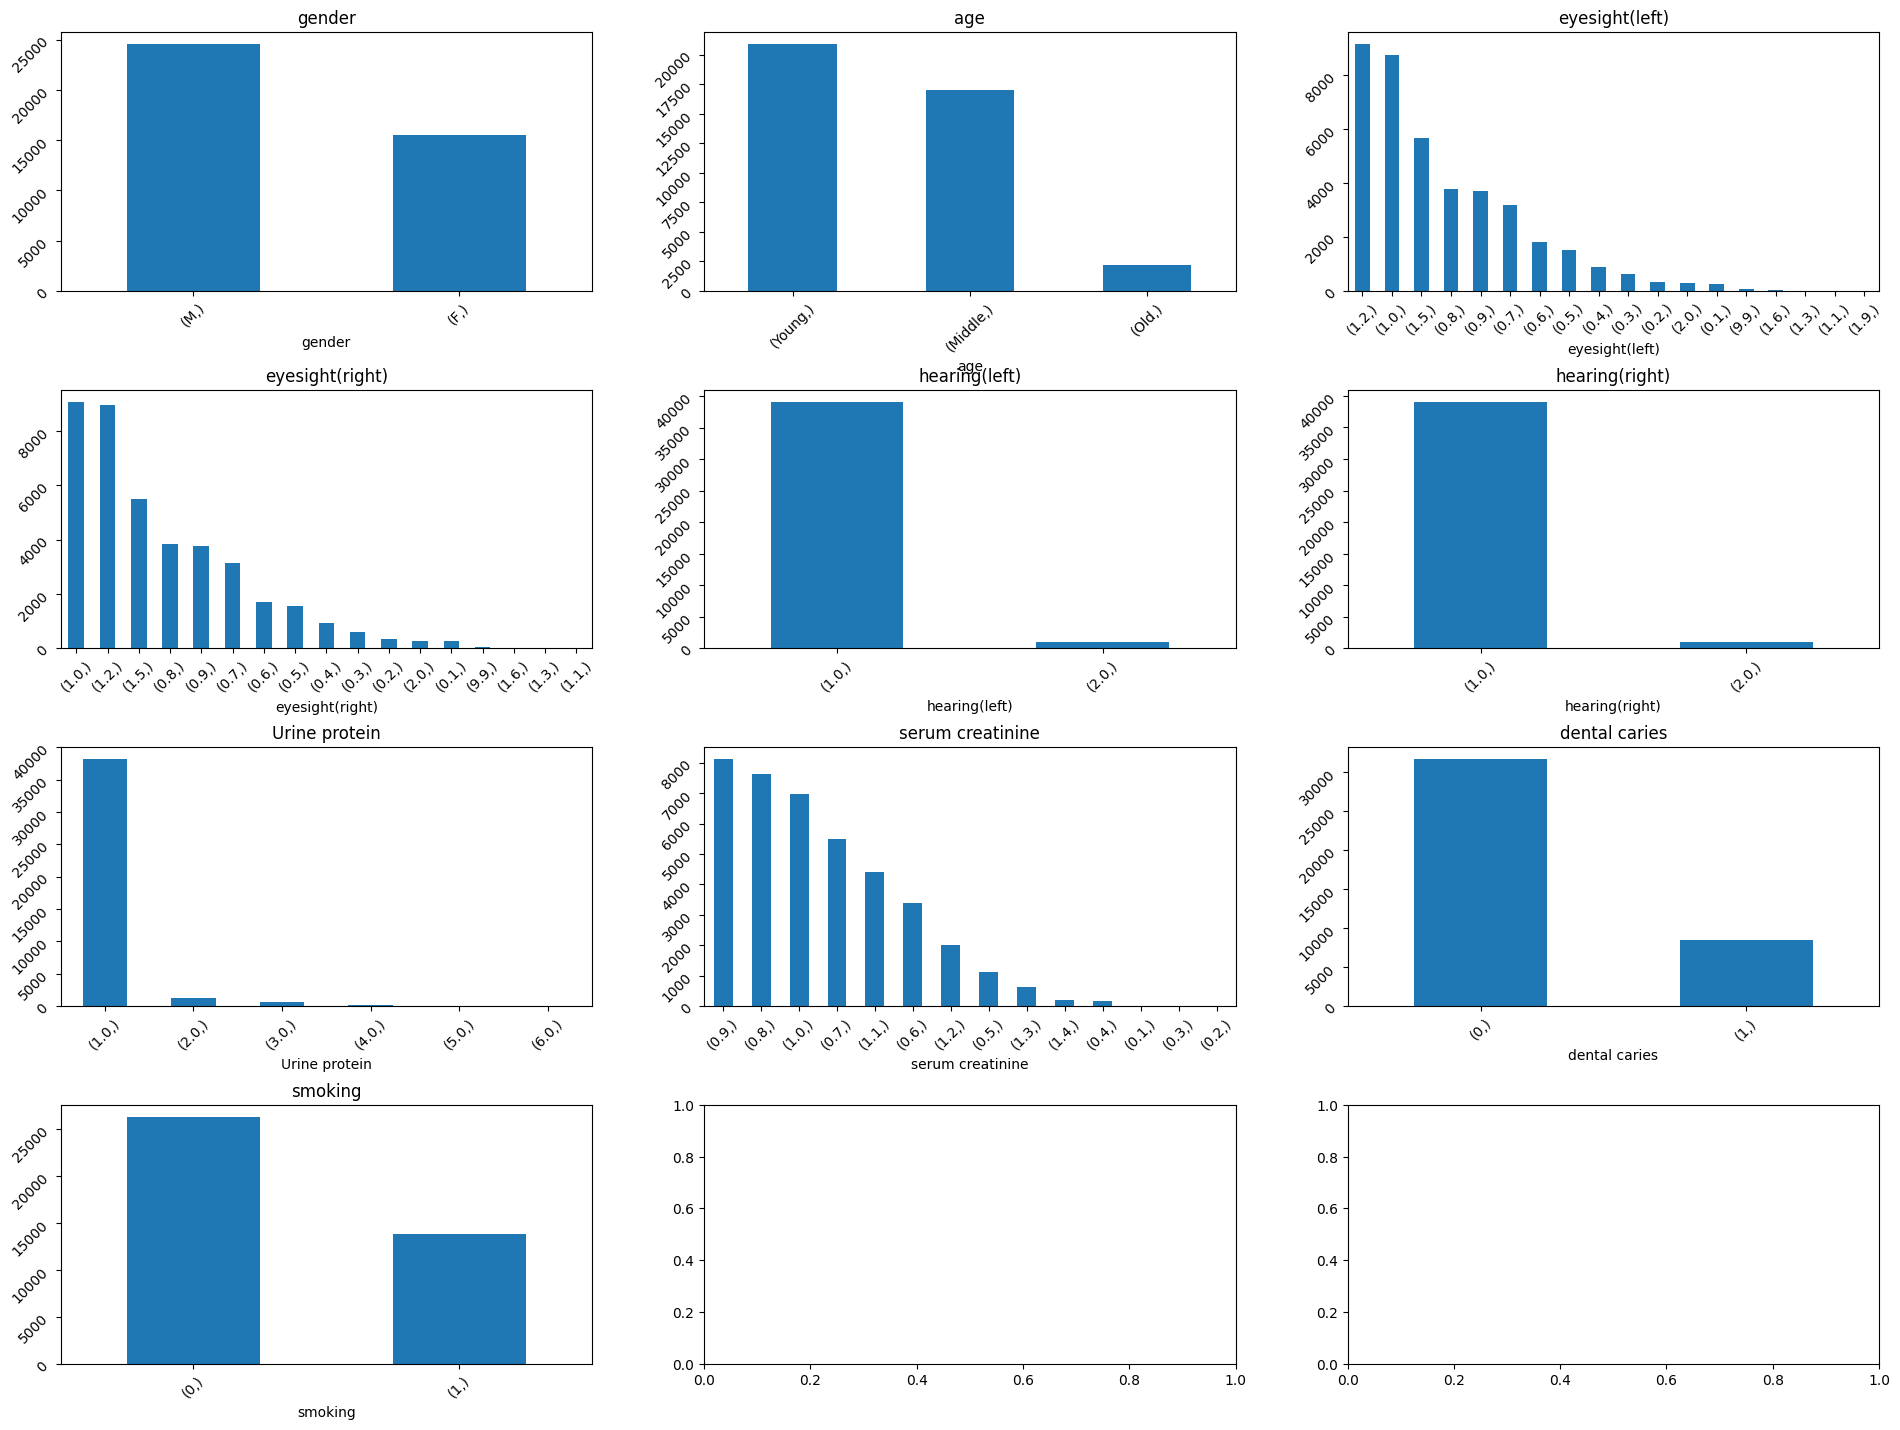

In [42]:
#Visualizations of frequency of values in each column
fig, axes = plt.subplots(nrows=4, ncols=3,figsize = (20,15))
fig.tight_layout(pad=5.0)
plot = 0
for i in range(4):
    for j in range(3):
        if(plot <10):
            df[[suspicious_cols[plot]]].value_counts().plot(ax=axes[i,j], kind='bar')
            axes[i,j].set_title(suspicious_cols[plot])
            axes[i,j].tick_params(labelrotation=45)
            plot += 1






In [28]:
#Correlation of other explaining variables with the target variable
df.corr().loc[:,["smoking"]].style.background_gradient(cmap='coolwarm')

,smoking
ID,0.009148
age,-0.170487
height(cm),0.399740
weight(kg),0.301396
waist(cm),0.217168
eyesight(left),0.059746
eyesight(right),0.064876
hearing(left),-0.027205
hearing(right),-0.021942
systolic,0.054805


In [29]:
#Checking now the categorical variables
display(df.drop(columns = ["ID"]).describe(include=np.object).style.background_gradient(cmap='Greens'))

,gender,oral,tartar
count,40096,40096,40096
unique,2,1,2
top,M,Y,Y
freq,24558,40096,22028


In [30]:
df["tartar"].value_counts()

Y    22028
N    18068
Name: tartar, dtype: int64

In [31]:
crosstab_results = pd.crosstab(df["smoking"],df["tartar"])
crosstab_results

tartar,N,Y
smoking,,
0,12740,13551
1,5328,8477


In [32]:
df["hemoglobin"][df["smoking"] == 1].value_counts()
df["hemoglobin"][df["smoking"] == 0].value_counts()

13.6    762
13.3    682
13.9    673
13.5    673
13.4    672
       ... 
19.0      1
19.5      1
5.5       1
6.1       1
6.2       1
Name: hemoglobin, Length: 130, dtype: int64

In [33]:
# We will run a Chi-squared test under the null hypothesis that the two 
# categorical variables are independent of each other.
from scipy.stats import chi2_contingency
chisq_results = chi2_contingency(crosstab_results)
print("Pval : ",chisq_results[1])

Pval :  2.9840121759907974e-79


In [34]:
#Categorizing the fasting blood sugar based on medical standards
df["fasting blood sugar"] = pd.cut(df["fasting blood sugar"], include_lowest=True ,bins = [df["fasting blood sugar"].min()
,80,100,df["fasting blood sugar"].max()] ,labels=["Normal","Pre-Diabetes","Diabetes"])

In [35]:
#Deriving a new feature based on existing features
df["BMI"] = df["weight(kg)"]/((df["height(cm)"]/100)**2)

In [36]:
#Categorizing the BMI Based on Medical Standards
df["BMI"] = pd.cut(df["BMI"], include_lowest=True ,bins = [df["BMI"].min()
,20,25,30,df["BMI"].max()] ,labels=["Underweight","Normal","Overweight","Obese"])

In [37]:
df["BMI"].value_counts()

Normal         22220
Overweight     11721
Underweight     4411
Obese           1744
Name: BMI, dtype: int64

In [38]:
df["fasting blood sugar"].value_counts()

Pre-Diabetes    25371
Diabetes        12282
Normal           2443
Name: fasting blood sugar, dtype: int64

In [39]:
#Binning the age column
df["age"] = pd.cut(df["age"], bins=3,labels=["Young","Middle","Old"])
#Binning the height column
df["height(cm)"] = pd.cut(df["height(cm)"], bins=3,labels=["Short","Middle","Tall"])
#Binning the weight column
df["weight(kg)"] = pd.cut(df["weight(kg)"], bins=3,labels=["Underweight","Normal","Overweight"])


(array([    0.,  2500.,  5000.,  7500., 10000., 12500., 15000., 17500.,
        20000., 22500.]),
 [Text(0.0, 0, '0'),
  Text(2500.0, 0, '2500'),
  Text(5000.0, 0, '5000'),
  Text(7500.0, 0, '7500'),
  Text(10000.0, 0, '10000'),
  Text(12500.0, 0, '12500'),
  Text(15000.0, 0, '15000'),
  Text(17500.0, 0, '17500'),
  Text(20000.0, 0, '20000'),
  Text(22500.0, 0, '22500')])

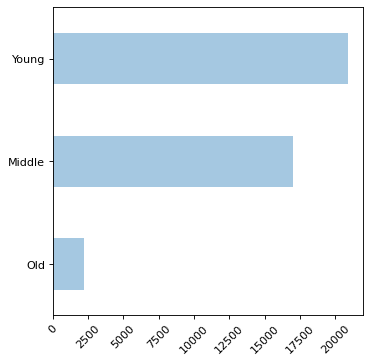

In [40]:
plt.figure(dpi=80,figsize=(5,5))
df["age"].value_counts().sort_values().plot(kind = "barh",alpha = 0.4)
plt.xticks(rotation=45)

